In [1]:
# Imports
# ! pip install --user pandas==1.5.3
# ! pip install matplotlib 
# ! pip install seaborn
# ! pip install scikit-learn
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler



In [59]:
# if using colab uncoment the two lines

# Specify the file path
# file_path = '/content/EnergyconsumptionPrediction/clean_data.csv'

file_path = 'datasets/clean_data.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

dataset = dataset.set_index("DateTime")
dataset.index = pd.to_datetime(dataset.index)

# Print the DataFrame or perform any desired operations
display(dataset)

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:00:00,11721.0,1,2016,2016-01-04,00:00:00,1,Monday
2016-01-04 01:00:00,11626.0,1,2016,2016-01-04,01:00:00,1,Monday
2016-01-04 02:00:00,11253.0,1,2016,2016-01-04,02:00:00,1,Monday
2016-01-04 03:00:00,10925.0,1,2016,2016-01-04,03:00:00,1,Monday
2016-01-04 04:00:00,10684.0,1,2016,2016-01-04,04:00:00,1,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday


In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52774 entries, 2016-01-04 00:00:00 to 2021-12-26 23:00:00
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Consumption  52774 non-null  float64
 1   Month        52774 non-null  int64  
 2   Year         52774 non-null  int64  
 3   Date         52774 non-null  object 
 4   Time         52774 non-null  object 
 5   Week         52774 non-null  int64  
 6   Day          52774 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 3.2+ MB


# LSTM Model

## Train, Validation and Test Dataset

In [25]:
dataset

,Consumption,Month,Year,Date,Time,Week,Day
DateTime,,,,,,,
2016-01-04 00:00:00,11721.0,1,2016,2016-01-04,00:00:00,1,Monday
2016-01-04 01:00:00,11626.0,1,2016,2016-01-04,01:00:00,1,Monday
2016-01-04 02:00:00,11253.0,1,2016,2016-01-04,02:00:00,1,Monday
2016-01-04 03:00:00,10925.0,1,2016,2016-01-04,03:00:00,1,Monday
2016-01-04 04:00:00,10684.0,1,2016,2016-01-04,04:00:00,1,Monday
...,...,...,...,...,...,...,...
2021-12-26 19:00:00,12550.0,12,2021,2021-12-26,19:00:00,51,Sunday
2021-12-26 20:00:00,12622.0,12,2021,2021-12-26,20:00:00,51,Sunday
2021-12-26 21:00:00,12574.0,12,2021,2021-12-26,21:00:00,51,Sunday


In [26]:
# Downsampling involves decreasing the time-frequency of the data
# Downsapling the time-frequency from hours to days 
newDataSet = dataset.resample("D").mean()
dataset.dtypes

C:\Users\salah\AppData\Local\Temp\ipykernel_1556\4012609752.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  newDataSet = dataset.resample("D").mean()


Consumption    float64
Month            int64
Year             int64
Date            object
Time            object
Week             int64
Day             object
dtype: object

In [27]:
# We have 2193 row
# 2193 - 3 - 6 = 2184 row after omit first two rows and last six ones.  
# 2184 / 7 = 312 week  
# 312 * 80 %  250 week for train (1750 day)  
# 312 - 250 = 62 week for test (434 day)
print("Old Dataset: ", dataset.shape)
print("New Dataset: ", newDataSet.shape)

Old Dataset:  (52774, 7)
New Dataset:  (2184, 4)


In [28]:
# Saving data in CSV new file
# newDataSet.to_csv("newDataSet.csv")
# from google.colab import files
# files.download("newDataSet.csv")

In [29]:
newDataSet.head()

,Consumption,Month,Year,Week
DateTime,,,,
2016-01-04,12300.625000,1.0,2016.0,1.0
2016-01-05,12945.375000,1.0,2016.0,1.0
2016-01-06,13192.750000,1.0,2016.0,1.0
2016-01-07,14243.541667,1.0,2016.0,1.0
2016-01-08,14121.666667,1.0,2016.0,1.0


In [30]:
y = newDataSet["Consumption"]
print(y[0])
y.shape

12300.625


(2184,)

In [31]:
# Normalize data before model fitting
# it will boost the performance( in neural networks) + transform
# scale of the output and input inthe range 0-1 to match the scale of the layer of LSTM
scaler = MinMaxScaler(feature_range = (0,1)) 
# reshape: convert the univariate 1D array into 2D
y = scaler.fit_transform(np.array(y).reshape(-1,1))
print("Normalizing data before model fitting")
print(y[:10])


Normalizing data before model fitting
[[0.75916744]
 [0.83908687]
 [0.86975003]
 [1.        ]
 [0.98489309]
 [0.82500258]
 [0.78623593]
 [0.83189672]
 [0.80348621]
 [0.8313604 ]]


In [32]:
training_size = int(len(y)*0.80)
test_size = len(y)- training_size
val_size = int(training_size*0.20)
train_data , test_data , val_data = y[0:training_size-val_size,:] , y[training_size:len(y),:1], y[len(y)-test_size-val_size:len(y)-test_size,:1]


In [33]:
# building input variable
def create_dataset(dataset, time_step = 1):
  dataX, dataY = [] , []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step),0]
    dataX.append(a)
    dataY.append(dataset[i + time_step,0])
  return np.array(dataX), np.array(dataY)


In [34]:
time_step = 100 
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)
X_val, yval = create_dataset(val_data, time_step)

In [35]:
# reshape train and input-output pairs
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1],1)

print("X_train shape: ", X_train.shape)
print("X_test shape: ",X_test.shape)
print("X_val shape: ",X_val.shape)


X_train shape:  (1297, 100, 1)
X_test shape:  (336, 100, 1)
X_val shape:  (248, 100, 1)


## Model Structure


In [38]:
# ! pip install tensorflow

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

model = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 100, return_sequences = True, input_shape = (time_step, 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# # Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
# model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 100)          40800     
                                                                 
 dropout_1 (Dropout)         (None, 100, 100)          0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 50)           30200     
                                                                 
 lstm_6 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_7 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                

## Model Training

In [40]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 240 ,batch_size = 20)

Epoch 1/240
65/65 [==============================] - 54s 468ms/step - loss: 0.0219 - val_loss: 0.0051
Epoch 2/240
65/65 [==============================] - 26s 402ms/step - loss: 0.0075 - val_loss: 0.0048
Epoch 3/240
65/65 [==============================] - 25s 391ms/step - loss: 0.0080 - val_loss: 0.0088
Epoch 4/240
65/65 [==============================] - 25s 387ms/step - loss: 0.0069 - val_loss: 0.0078
Epoch 5/240
65/65 [==============================] - 25s 391ms/step - loss: 0.0074 - val_loss: 0.0064
Epoch 6/240
65/65 [==============================] - 25s 386ms/step - loss: 0.0063 - val_loss: 0.0046
Epoch 7/240
65/65 [==============================] - 25s 392ms/step - loss: 0.0061 - val_loss: 0.0046
Epoch 8/240
65/65 [==============================] - 26s 401ms/step - loss: 0.0059 - val_loss: 0.0039
Epoch 9/240
65/65 [==============================] - 25s 385ms/step - loss: 0.0063 - val_loss: 0.0050
Epoch 10/240
65/65 [==============================] - 27s 408ms/step - loss: 0.005

In [ ]:
history = model.fit(X_train, y_train, validation_data = (X_val,yval), verbose = 1,epochs = 240 ,batch_size = 20)

Epoch 1/240
65/65 [==============================] - 29s 295ms/step - loss: 0.0226 - val_loss: 0.0047
Epoch 2/240
65/65 [==============================] - 16s 240ms/step - loss: 0.0077 - val_loss: 0.0060
Epoch 3/240
65/65 [==============================] - 15s 233ms/step - loss: 0.0072 - val_loss: 0.0042
Epoch 4/240
65/65 [==============================] - 18s 274ms/step - loss: 0.0067 - val_loss: 0.0043
Epoch 5/240
65/65 [==============================] - 19s 288ms/step - loss: 0.0064 - val_loss: 0.0039
Epoch 6/240
65/65 [==============================] - 17s 250ms/step - loss: 0.0066 - val_loss: 0.0038
Epoch 7/240
65/65 [==============================] - 15s 236ms/step - loss: 0.0069 - val_loss: 0.0044
Epoch 8/240
65/65 [==============================] - 15s 231ms/step - loss: 0.0065 - val_loss: 0.0037
Epoch 9/240
65/65 [==============================] - 25s 385ms/step - loss: 0.0053 - val_loss: 0.0036
Epoch 10/240
65/65 [==============================] - 15s 233ms/step - loss: 0.005

In [45]:
model.save('models/LSTM-5Layers.h5')

## Model Evaluation

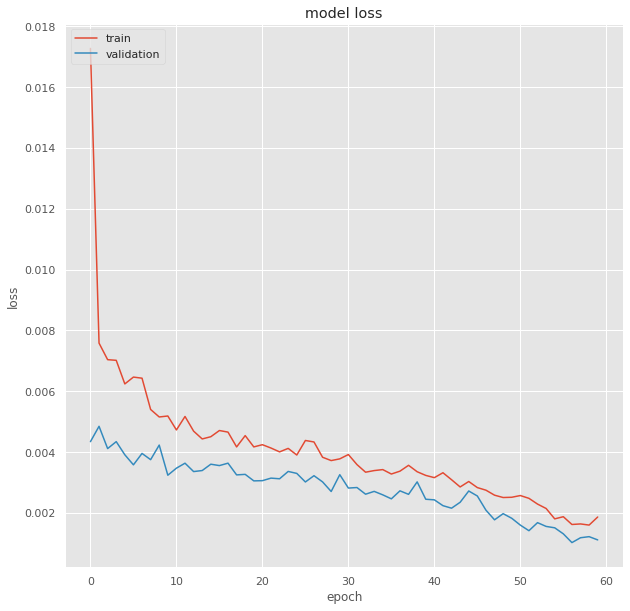

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


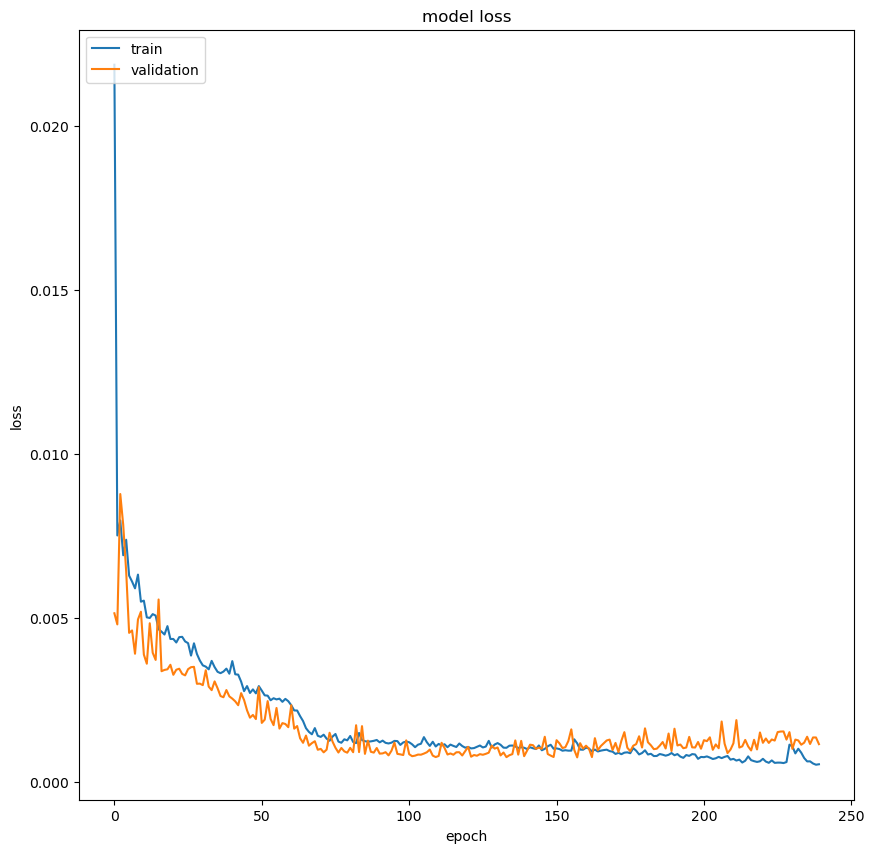

In [46]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss']) # tb
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [47]:
import tensorflow as tf
tf.__version__

'2.12.0'

In [48]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
val_predict=model.predict(X_val)


8/8 [==============================] - 1s 141ms/step


In [49]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
val_predict=scaler.inverse_transform(val_predict)

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

9556.50143934429

In [51]:
print(train_predict.shape)
print(test_predict.shape)
print(val_predict.shape)
print(train_predict[0])
print(y_train.shape)


(1297, 1)
(336, 1)
(248, 1)
[9545.681]
(1297,)


# Conclusion

In [52]:
# Predicting consumption using training data
train_predictions = model.predict(X_train)
train_predictions =scaler.inverse_transform(train_predictions)

y_train = y_train.reshape(y_train.shape[0], 1)
actual = scaler.inverse_transform(y_train)
train_results = pd.DataFrame()

train_results["Train Predictions"] = train_predictions.tolist()
train_results["Actuals"] = actual.tolist()

train_results

41/41 [==============================] - 6s 148ms/step


,Train Predictions,Actuals
0,[9545.6806640625],[9406.708333333334]
1,[9591.138671875],[9614.791666666666]
2,[9629.6103515625],[9894.708333333334]
3,[9215.513671875],[8933.708333333334]
4,[8622.619140625],[8557.208333333334]
...,...,...
1292,[9041.064453125],[9259.666666666666]
1293,[10118.6220703125],[10248.5]
1294,[10497.2177734375],[10360.333333333334]
1295,[10285.0029296875],[10489.833333333334]


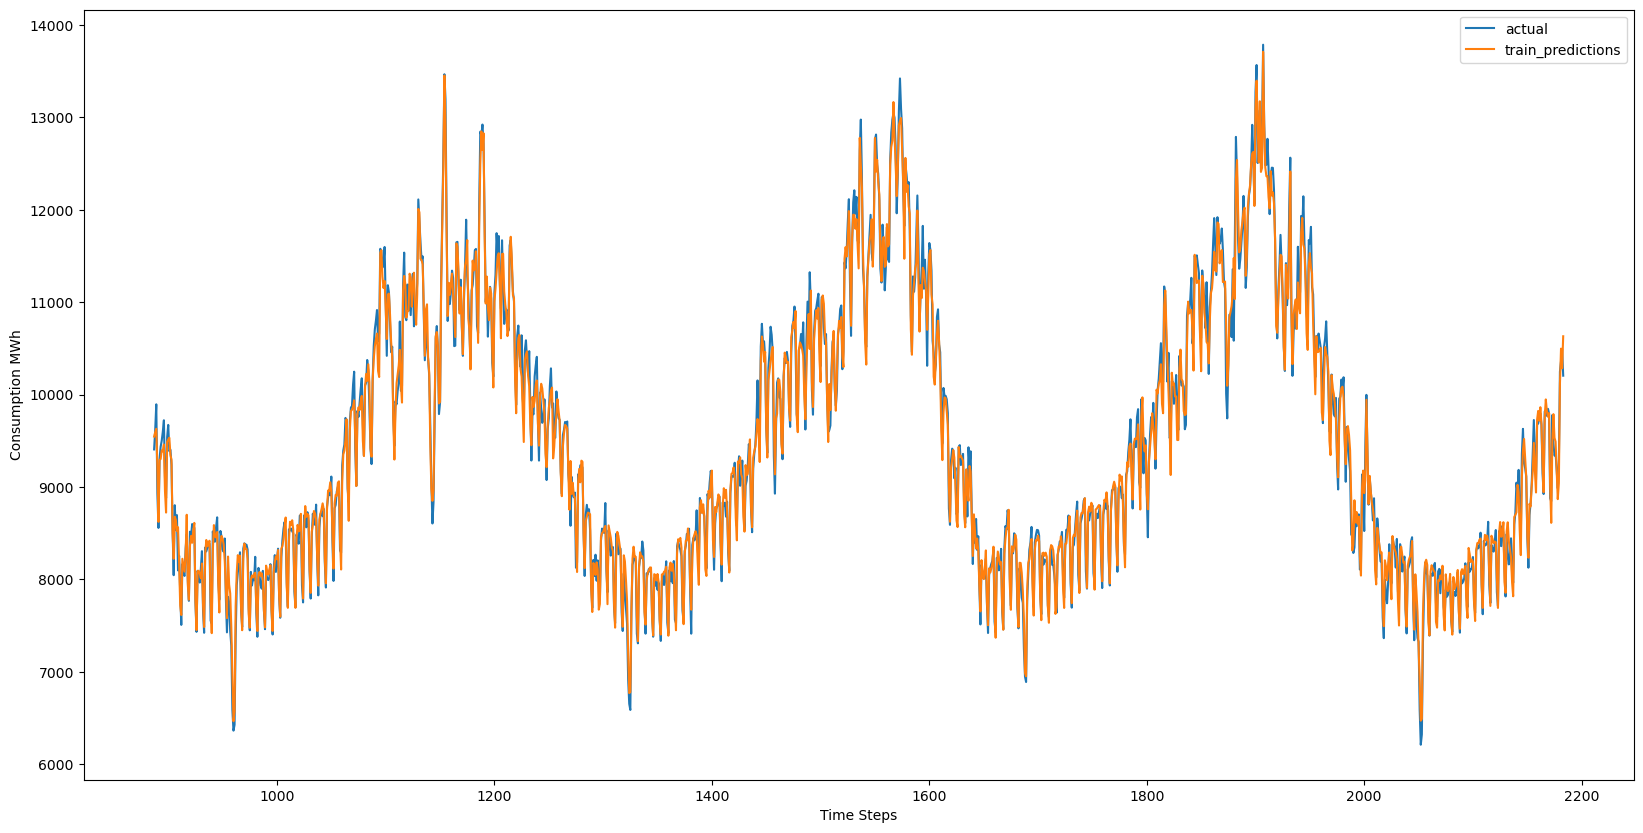

In [53]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y )
ActualPlot[:, :] = np.nan
ActualPlot[887:, :] = actual.tolist()
plt.plot(ActualPlot)

TrainPredictionsPlot = np.empty_like(y )
TrainPredictionsPlot[:, :] = np.nan
TrainPredictionsPlot[887:, :] = train_predictions.tolist()
plt.plot(TrainPredictionsPlot)

plt.legend(['actual','train_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

In [54]:
# Predicting consumption using validation data
val_predictions = model.predict(X_val)
val_predictions =scaler.inverse_transform(val_predictions)

yval = yval.reshape(yval.shape[0], 1)
actual_val = scaler.inverse_transform(yval)

val_results = pd.DataFrame()
val_results["Val Predictions"] = val_predictions.tolist()
val_results["Actuals_val"] = actual_val.tolist()

val_results


8/8 [==============================] - 1s 171ms/step


,Val Predictions,Actuals_val
0,[9778.4453125],[8931.875]
1,[9583.591796875],[9112.916666666666]
2,[9459.080078125],[10019.416666666666]
3,[10242.1669921875],[10390.375]
4,[10702.095703125],[10802.916666666666]
...,...,...
243,[7984.93896484375],[8020.541666666667]
244,[7749.16552734375],[7921.75]
245,[8608.96875],[8705.041666666666]
246,[8755.328125],[8824.708333333334]


Text(0, 0.5, 'Consumption MWh')

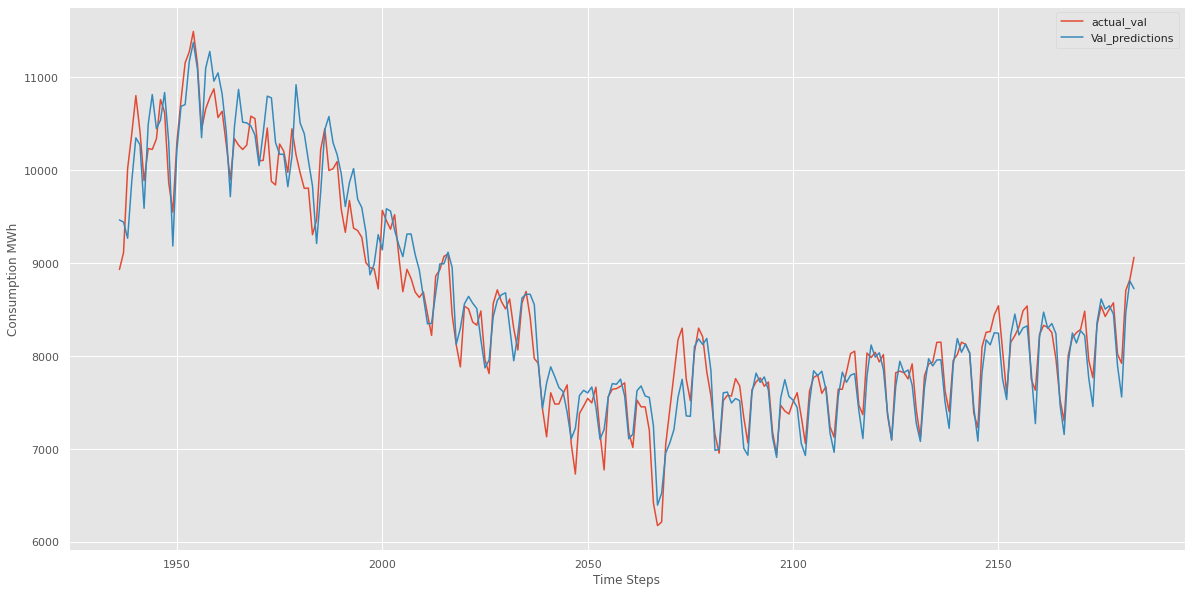

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


Text(0, 0.5, 'Consumption MWh')

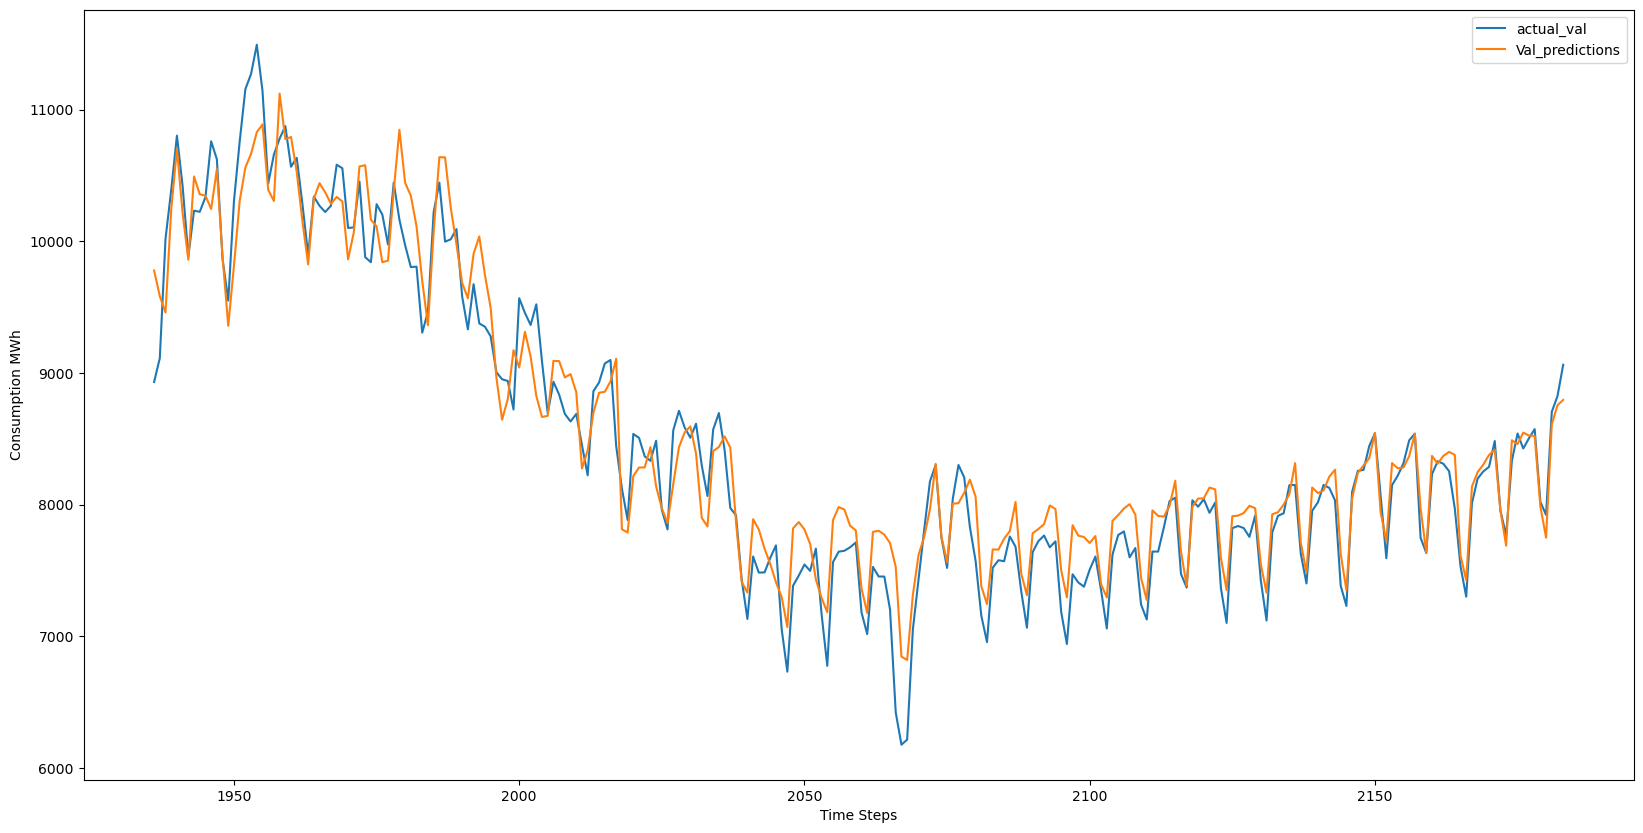

In [55]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1936:, :] = actual_val.tolist()
plt.plot(ActualPlot)

# Validation Prediction
ValPredictionsPlot = np.empty_like(y)
ValPredictionsPlot[:, :] = np.nan
ValPredictionsPlot[1936:, :] = val_predictions.tolist()
plt.plot(ValPredictionsPlot)

plt.legend(['actual_val','Val_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')


In [ ]:
# Predicting consumption using test data
test_predictions = model.predict(X_test)
test_predictions =scaler.inverse_transform(test_predictions)

ytest = ytest.reshape(ytest.shape[0], 1)
actual_test = scaler.inverse_transform(ytest)

test_results = pd.DataFrame()
test_results["test Predictions"] = test_predictions.tolist()
test_results["Actuals_test"] = actual_test.tolist()

test_results

11/11 [==============================] - 1s 48ms/step


,test Predictions,Actuals_test
0,[10712.892578125],[10032.541666666666]
1,[10967.88671875],[10732.125]
2,[11226.8046875],[10733.583333333334]
3,[10984.1884765625],[10971.875]
4,[11233.515625],[11227.791666666666]
...,...,...
331,[12463.0830078125],[12540.25]
332,[12646.2041015625],[12635.958333333334]
333,[12786.44921875],[11684.333333333334]
334,[11333.5302734375],[11384.166666666666]


Text(0, 0.5, 'Consumption MWh')

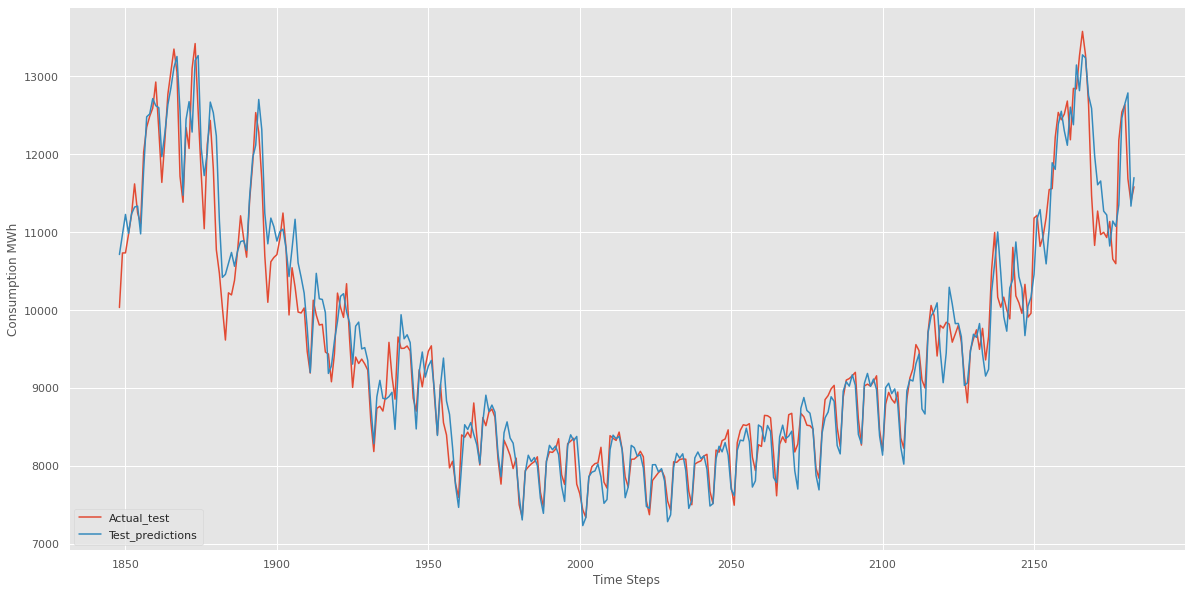

In [ ]:
plt.figure(figsize=(20,10))

# Actual Consumption
ActualPlot = np.empty_like(y)
ActualPlot[:, :] = np.nan
ActualPlot[1848:, :] = actual_test.tolist()
plt.plot(ActualPlot)

# Test Prediction
TestPredictionsPlot = np.empty_like(y)
TestPredictionsPlot[:, :] = np.nan
TestPredictionsPlot[1848:, :] = test_predictions.tolist()
plt.plot(TestPredictionsPlot)

plt.legend(['Actual_test','Test_predictions'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')

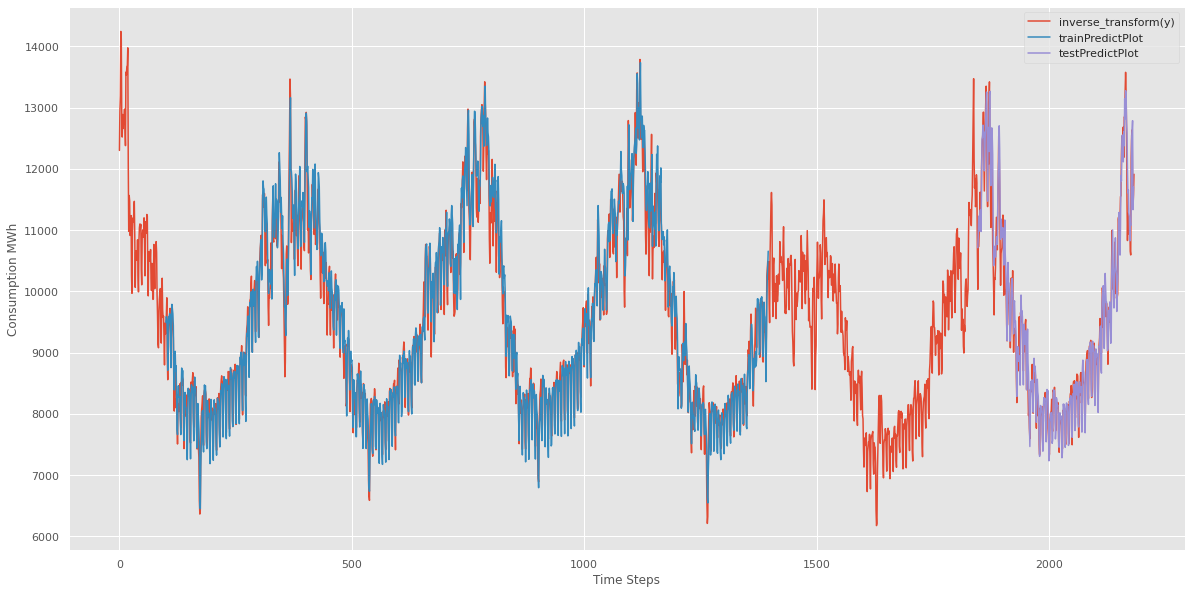

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100 #*****************************************>>>>>100
fig, ax = plt.subplots(figsize=(20,10))
trainPredictPlot = np.empty_like(y)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(y)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1+349:len(y)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(y))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.legend(['inverse_transform(y)','trainPredictPlot','testPredictPlot'])
plt.xlabel('Time Steps')
plt.ylabel('Consumption MWh')
plt.show()

# Future forecasting

In [ ]:
print(len(test_data))
print(test_data[0])
print(len(train_data))
x_input=test_data[337:].reshape(1,-1)
print(x_input.shape)
# print(x_input[0])
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
# print(temp_input)

437
[0.40285095]
1398
(1, 100)


In [58]:

# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
test = ""
while(i<30):
    
    if(len(temp_input)>100):
        test = "if"
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        test="else"
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

    
print(test)
print(len(lst_output))

NameError: name 'temp_input' is not defined

In [56]:
print(len(y))
day_new=np.arange(1,101)
day_pred=np.arange(101, 131 )
plt.figure(figsize = (15,10))
plt.plot(day_new,scaler.inverse_transform(y[2084:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))
print(scaler.inverse_transform(lst_output))

2184


NameError: name 'lst_output' is not defined

<Figure size 1500x1000 with 0 Axes>

In [57]:
df3=y.tolist()
df3.extend(lst_output)
plt.figure(figsize=(15,10))
plt.plot(df3[2000:])



NameError: name 'lst_output' is not defined